['159.jpg', '127.jpg', '170.jpg', '150.jpg', '148.jpg', '140.jpg', '145.jpg', '138.jpg', '86.jpg', '70.jpg', '116.jpg', '106.jpg', '32.jpg', '59.jpg', '61.jpg', '79.jpg', '149.jpg', '67.jpg', '64.jpg', '73.jpg', '108.jpg', '42.jpg', '164.jpg', '26.jpg', '15.jpg', '134.jpg', '165.jpg', '12.jpg', '133.jpg', '96.jpg', '122.jpg', '162.jpg', '80.jpg', '154.jpg', '123.jpg', '151.jpg', '93.jpg', '147.jpg', '57.jpg', '119.jpg', '132.jpg', '50.jpg', '81.jpg', '110.jpg', '22.jpg', '109.jpg', '3.jpg', '10.jpg', '161.jpg', '113.jpg', '142.jpg', '141.jpg', '33.jpg', '92.jpg', '2.jpg', '19.jpg', '99.jpg', '137.jpg', '23.jpg', '89.jpg', '60.jpg', '85.jpg', '136.jpg', '152.jpg', '153.jpg', '51.jpg', '55.jpg', '117.jpg', '1.jpg', '52.jpg', '65.jpg', '63.jpg', '84.jpg', '17.jpg', '130.jpg', '124.jpg', '71.jpg', '43.jpg', '115.jpg', '95.jpg', '25.jpg', '131.jpg', '45.jpg', '98.jpg', '139.jpg', '126.jpg', '58.jpg', '74.jpg', '90.jpg', '87.jpg', '83.jpg', '118.jpg', '76.jpg', '75.jpg', '100.jpg', '44.jpg',

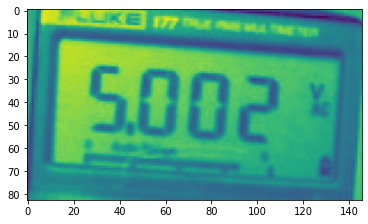

In [54]:
import numpy as np
import os 
import cv2
import matplotlib.pyplot as plt

#This function will be called for "files" and "files_values"

def magic(lst):
  for i in range(len(lst)):
    lst[i] = lst[i].split('.')[0]
    lst[i] = int(lst[i])
  lst.sort()
  for i in range(len(lst)):
    lst[i] = str(lst[i])
  return lst 

def preprocess(image):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    se=cv2.getStructuringElement(cv2.MORPH_RECT , (8,8))
    bg=cv2.morphologyEx(image, cv2.MORPH_DILATE, se)
    out_gray=cv2.divide(image, bg, scale=255)
    out_binary=cv2.threshold(out_gray, 0, 255, cv2.THRESH_OTSU )[1]
    kernel = np.ones((3,1),np.uint8)
    opening = cv2.morphologyEx(out_binary, cv2.MORPH_OPEN, kernel)
   
    #bordersize = 50
    #expanded = cv2.copyMakeBorder(opening,
    #                    top=bordersize,
    #                    bottom=bordersize,
    #                    left=bordersize,
    #                    right=bordersize,
    #                    borderType=cv2.BORDER_CONSTANT,
    #                    value=[255, 255, 255]
    #                )
   
    return opening

file2 = open('deneme.txt','+w')

grayLevel = "154 " # A random number to see how it looks like
status=" ok " #initial value for status of an image 

path_train ="/tmp/train"
files = os.listdir(path_train)
path_values = "/tmp/values"
files_values = os.listdir(path_values)



badOnes =['71.jpg','93.jpg','108.jpg','118.jpg','167.jpg','170.jpg']
label_data = np.empty(len(files_values),dtype=object)
training_images = np.empty(len(files),dtype=object)

#Job related to labels
for i in range(0,len(files_values)):
  with open(path_values+'/'+(str(magic(files_values)[i])+ '.txt')) as f :
    for l in f :
      label_data[i] = l.strip().split(";") #numpy array to store labels

#Job related to images and writing to the file 
for i in range(0,len(files)):
  #Read the images with two channels 
  training_images[i] = cv2.imread(os.path.join(path_train, (str(magic(files)[i])+ '.jpg')),2)
  
 #training_images[i] = preprocess(training_images[i])
  (x,y)=training_images[i].shape # taking the shape of the image 
  if (magic(files)[i]+'.jpg' in badOnes ):
    status =" err "
  else :
    status = " ok "
  file2.write( magic(files)[i] + status+grayLevel+ "0 " + "0 " + str(x) + " "+ str(y)+
              " "+ label_data[i][0] + label_data[i][1] + " "+ label_data[i][2]+"\n")


plt.imshow(training_images[11])
print(label_data[11])

In [ ]:
!cat deneme.txt


0 ok 154 0 0 87 149 30.0 
1 ok 154 0 0 82 180 266.3 VDC
2 ok 154 0 0 79 144 -1000 VDC
3 ok 154 0 0 180 272 50.0 VDC
4 ok 154 0 0 117 241 -299.8 mVDC
6 ok 154 0 0 59 134 269.3 VDC
8 ok 154 0 0 83 172 999 VDC
9 ok 154 0 0 78 193 299.2 
10 ok 154 0 0 113 232 5.002 VAC
11 ok 154 0 0 117 237 4.008 AAC
12 ok 154 0 0 87 168 30.0 mVDC
13 ok 154 0 0 83 146 5.002 VAC
15 ok 154 0 0 119 226 50.07 mAAC
17 ok 154 0 0 82 144 501.2 VAC
18 ok 154 0 0 113 219 501.2 VAC
19 ok 154 0 0 77 184 .998 M
20 ok 154 0 0 87 170 299.9 VDC
22 ok 154 0 0 79 158 2.710 VAC
23 ok 154 0 0 81 147 -299.8 mVDC
24 ok 154 0 0 120 228 45.00 DCHz
25 ok 154 0 0 56 127 269.4 VDC
26 ok 154 0 0 146 237 600.0 
27 ok 154 0 0 87 170 1000 VDC
29 ok 154 0 0 83 200 1001 
31 ok 154 0 0 178 269 249.8 VDC
32 ok 154 0 0 101 178 -1000 VDC
33 ok 154 0 0 118 239 299.9 VDC
34 ok 154 0 0 78 191 10.01 M
35 ok 154 0 0 94 101 2.693 VDC
36 ok 154 0 0 179 271 100.0 VDC
39 ok 154 0 0 91 172 4.998 VDC
42 ok 154 0 0 80 145 1000 VDC
43 ok 154 0 0 84 146 9